# Análisis de observaciones influyentes

**Asignatura**: SNS  
**Número de actividad**: 2_2  
**Fecha**: 08/12/2024  
**Alumno**: Pedro García Ramírez   

## **Cuaderno demo: Panda, Numpy, MatPlotLib, funciones anónimas y carga de ficheros**

24_25


# Introducción a Numpy y Panda

Web: [Numpy](https://numpy.org/)

Web: [Pandas](https://pandas.pydata.org/)

Web: [Matplotlib](https://matplotlib.org/)

Web: [Scipy](https://scipy.org/)

Web: [Scikit-learn](https://scikit-learn.org/stable/)

In [ ]:
import matplotlib
# CARGAMOS LIBRERIAS
# ==============================================================================
# Importamos la librería NUMPY para CÁLCULO NUMÉRICO Y ANÁLISIS DE DATOS
import numpy as np
# PANDAS para MANIPULACIÓN y ANÁLISIS DE DATOS
import pandas as pd
# MATPLOTLIB para GRAFICOS
import matplotlib.pyplot as plt
# SCIPY para CÁLCULO MATEMÁTICO
import scipy # necesario para conocer la versión
import scipy.stats as st
# Preprocesado
#==============================================================================
import sklearn # necesario para conocer la versión
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector
# Versiones
#==============================================================================
version_np = np.version.version
version_pd = pd.__version__
version_plt = matplotlib.__version__
version_scipy = scipy.__version__
version_sklearn = sklearn.__version__


**Creación de objetos:**

1.   Objeto array (numpy)
2.   Objeto DataFrame (pandas)



**Objeto array** Todos los datos del mismo tipo (dtype)

In [ ]:
# creación de una matriz de números floats
x=np.array([[1.,2,3, 4],[5,6,7,8],[9,10,11,12]])
x

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]])

In [ ]:
# tipo de datos
x.dtype

dtype('float64')

In [ ]:
# array con contenido de cadenas
x_txt=np.array([['a','b','c'],['d','e','f'],['g','h','i']])
x_txt.dtype # <U1 --> Significa tipo de dato unicode de longitud 1


dtype('<U1')

In [ ]:
# Acceso a elementos x[filas,columnas]
# Atención: empieza a numerar desde el 0
x[0,0]

1.0

In [ ]:
# También se puede utilizar
x[0][0]

1.0

In [ ]:
# Columna 2
x[:,1]

array([ 2.,  6., 10.])

# Ejer 1: Mostrar la columa 4

In [ ]:
# Ejer 1: Mostrar la columa 4
x[:,3]

array([ 4.,  8., 12.])

In [ ]:
# Fila 2
x[1,:]

array([5., 6., 7., 8.])

#Ejer 2: mostrar la fila 1

In [ ]:
#Ejer 2: mostrar la fila 1
x[1,:]

array([5., 6., 7., 8.])

In [ ]:
# Extraer la submatriz columnas 2 y 4
x_new=x[:,[1,3]]
x_new

array([[ 2.,  4.],
       [ 6.,  8.],
       [10., 12.]])

#Ejer 3: Extraer la submatriz de las filas 1 y 3

In [ ]:
#Ejer 3: Extraer la submatriz de las filas 1 y 3
x_new=x[:,[0,2]]
x_new


array([[ 1.,  3.],
       [ 5.,  7.],
       [ 9., 11.]])

**Definición 1:** Crear un dataframe directamente

**¿Qué es un dataframe?**

Un DataFrame es una estructura de datos con dos dimensiones en la cual se puede guardar datos de distintos tipos (como caractéres, enteros, valores de punto flotante, factores y más) en columnas. Es similar a una hoja de cálculo o una tabla de SQL o el data.frame de R. Un DataFrame siempre tiene un índice (con inicio en 0). El índice refiere a la posición de un elemento en la estructura de datos.

Título: [Comenzando con datos](https://datacarpentry.org/python-ecology-lesson-es/02-starting-with-data/)


**Objeto DataFrame** Las columnas de la tabla pueden tener diferentes *dtype*

In [ ]:
# Definición de DataFrame
df=pd.DataFrame(
    {"A": 1.0,
     "B": pd.Categorical(["H","H","H","M","M"]),
     "C": np.array([1., 2., 3., 4., 5.]),
    }
)

In [ ]:
# visualización del objeto DataFrame df
df

,A,B,C
0,1.0,H,1.0
1,1.0,H,2.0
2,1.0,H,3.0
3,1.0,M,4.0
4,1.0,M,5.0


In [ ]:
df.dtypes

,0
A,float64
B,category
C,float64


In [ ]:
#Resumen estadística basica descriptiva
df.describe()

,A,C
count,5.0,5.000000
mean,1.0,3.000000
std,0.0,1.581139
min,1.0,1.000000
25%,1.0,2.000000
50%,1.0,3.000000
75%,1.0,4.000000
max,1.0,5.000000


#Ejer 4: crear un dataframe con una lista (ficticia) de municipios de Gran canaria y el número de habitantes separados por géneros (Masculino, Femenino, etc...)

In [ ]:
#Ejer 4: crear un dataframe con una lista (ficticia) de municipios de Gran canaria y el número de habitantes separados por géneros (Masculino, Femenino, etc...)
import pandas as pd

# Datos ficticios de municipios de Gran Canaria
data = {
    'Municipio': ['Agaete', 'Agüimes', 'Arucas', 'Firgas', 'Gáldar', 'Ingenio', 'Mogán', 'Moya', 'Las Palmas de Gran Canaria', 'San Bartolomé de Tirajana'],
    'Masculino': [2800, 15000, 19000, 3500, 12000, 16000, 8000, 4000, 200000, 50000],
    'Femenino': [3000, 16000, 20000, 3600, 13000, 17000, 8500, 4200, 210000, 51000]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Calcular el total de habitantes por municipio
df['Total'] = df['Masculino'] + df['Femenino']

# Mostrar el DataFrame
df


,Municipio,Masculino,Femenino,Total
0,Agaete,2800,3000,5800
1,Agüimes,15000,16000,31000
2,Arucas,19000,20000,39000
3,Firgas,3500,3600,7100
4,Gáldar,12000,13000,25000
5,Ingenio,16000,17000,33000
6,Mogán,8000,8500,16500
7,Moya,4000,4200,8200
8,Las Palmas de Gran Canaria,200000,210000,410000
9,San Bartolomé de Tirajana,50000,51000,101000


#Ejer 5: Mostrar los tipos de datos asociados a cada columna

In [ ]:
#Ejer 5: Mostrar los tipos de datos asociados a cada columna
df.dtypes

,0
Municipio,object
Masculino,int64
Femenino,int64
Total,int64


#Ejer 6: modificar uno o más valores de una de las columnas

In [ ]:
#Ejer 6: modificar uno o más valores de una de las columnas
import pandas as pd

# Datos ficticios de municipios de Gran Canaria
data = {
    'Municipio': ['Agaete', 'Agüimes', 'Arucas', 'Firgas', 'Gáldar', 'Ingenio', 'Mogán', 'Moya', 'Las Palmas de Gran Canaria', 'San Bartolomé de Tirajana'],
    'Masculino': [2800, 15000, 19000, 3500, 12000, 16000, 8000, 4000, 200000, 50000],
    'Femenino': [3000, 16000, 20000, 3600, 13000, 17000, 8500, 4200, 210000, 51000]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Modificar el valor de 'Masculino' para 'Agaete'
df.loc[df['Municipio'] == 'Agaete', 'Masculino'] = 3000

# Mostrar el DataFrame actualizado
df


,Municipio,Masculino,Femenino
0,Agaete,3000,3000
1,Agüimes,15000,16000
2,Arucas,19000,20000
3,Firgas,3500,3600
4,Gáldar,12000,13000
5,Ingenio,16000,17000
6,Mogán,8000,8500
7,Moya,4000,4200
8,Las Palmas de Gran Canaria,200000,210000
9,San Bartolomé de Tirajana,50000,51000


#Ejer 7: Cambiar alguno de los valores de forma directa

In [ ]:
#Ejer 7: Cambiar alguno de los valores de forma directa
import pandas as pd

# Datos ficticios de municipios de Gran Canaria
data = {
    'Municipio': ['Agaete', 'Agüimes', 'Arucas', 'Firgas', 'Gáldar', 'Ingenio', 'Mogán', 'Moya', 'Las Palmas de Gran Canaria', 'San Bartolomé de Tirajana'],
    'Masculino': [2800, 15000, 19000, 3500, 12000, 16000, 8000, 4000, 200000, 50000],
    'Femenino': [3000, 16000, 20000, 3600, 13000, 17000, 8500, 4200, 210000, 51000]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Cambiar directamente el valor de 'Masculino' para 'Agaete' a 3500
df.at[0, 'Masculino'] = 3500

# Mostrar el DataFrame actualizado
df


,Municipio,Masculino,Femenino
0,Agaete,3500,3000
1,Agüimes,15000,16000
2,Arucas,19000,20000
3,Firgas,3500,3600
4,Gáldar,12000,13000
5,Ingenio,16000,17000
6,Mogán,8000,8500
7,Moya,4000,4200
8,Las Palmas de Gran Canaria,200000,210000
9,San Bartolomé de Tirajana,50000,51000


#Ejer 8: Obtener estadística basica descriptiva

In [ ]:
#Ejer 8: Obtener estadística basica descriptiva
df.describe ()

,Masculino,Femenino
count,10.000000,10.000000
mean,33100.000000,34630.000000
std,60216.645908,63187.974418
min,3500.000000,3000.000000
25%,5000.000000,5275.000000
50%,13500.000000,14500.000000
75%,18250.000000,19250.000000
max,200000.000000,210000.000000


**Definición 2**: a partir de un objeto array (creado con numpy) crear un dataframe

In [ ]:
# creamos 70 fechas consecutivas iniciando en el día 10-sep-2022, (en inglés, 20220910)
fechas = pd.date_range("20220910", periods=70)
fechas

DatetimeIndex(['2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13',
               '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
               '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21',
               '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25',
               '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
               '2022-09-30', '2022-10-01', '2022-10-02', '2022-10-03',
               '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07',
               '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11',
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23',
               '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
               '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31',
               '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
      

In [ ]:
# x-> datos, index-> nombre de filas (es la forma con la que se podrán identificar cada fila), colums-> nombre de columnas
# Generamos una matriz de 70 filas por 2 columnas de números aleatorios "normales" (Distribución normal)
# de media 0 y desviación típica 1
df_fechas = pd.DataFrame(np.random.randn(70, 2),index=fechas,columns=["col1","col2"])
df_fechas

,col1,col2
2022-09-10,-0.615440,0.087540
2022-09-11,-0.703449,0.800757
2022-09-12,-0.856448,0.546023
2022-09-13,-0.105544,-0.186006
2022-09-14,-0.975237,-1.057925
...,...,...
2022-11-14,-2.225282,0.145707
2022-11-15,-0.678519,0.690851
2022-11-16,0.548980,0.773134
2022-11-17,-2.380370,-0.800246


In [ ]:
# Metodos objeto.metodo df.< TAB >
# Ejemplos: situate al final del comando + barra espaciadora
#           df.head() primeros registros
#           df.tail() ultimos registros
#           df.index() nombre de las filas
#           df.columns()  nombre de las columnas
#           df.describe() estadística basica descriptiva
#           df.T() transpuesta
df_fechas.describe()

,col1,col2
count,70.000000,70.000000
mean,-0.091545,-0.175012
std,0.873899,0.931325
min,-2.380370,-2.086222
25%,-0.688543,-0.710005
50%,-0.086064,-0.192782
75%,0.542534,0.224781
max,1.926779,2.403486


#Ejer 9: realizar un ejemplo de cada uno de los siguientes comandos
#           df_fechas.head() primeros registros
#           df_fechas.tail() ultimos registros
#           df_fechas.index nombre de las filas
#           df_fechas.columns  nombre de las columnas
#           df_fechas.describe() estadística basica descriptiva
#           df_fechas.T transpuesta

In [ ]:
#Ejer 9: realizar un ejemplo de cada uno de los siguientes comandos
#           df_fechas.head() primeros registros
#           df_fechas.tail() ultimos registros
#           df_fechas.index nombre de las filas
#           df_fechas.columns  nombre de las columnas
#           df_fechas.describe() estadística basica descriptiva
#           df_fechas.T transpuesta

# 1. df_fechas.head() - primeros registros
print("Primeros registros:")
print(df_fechas.head())  # Muestra los primeros 5 registros
print("\n")

# 2. df_fechas.tail() - últimos registros
print("Últimos registros:")
print(df_fechas.tail())  # Muestra los últimos 5 registros
print("\n")

# 3. df_fechas.index - nombre de las filas
print("Nombres de las filas (índices):")
print(df_fechas.index)  # Muestra el índice de las filas
print("\n")

# 4. df_fechas.columns - nombres de las columnas
print("Nombres de las columnas:")
print(df_fechas.columns)  # Muestra los nombres de las columnas
print("\n")

# 5. df_fechas.describe() - estadística básica descriptiva
print("Estadísticas básicas descriptivas:")
print(df_fechas.describe())  # Muestra estadísticas básicas para las columnas numéricas
print("\n")

# 6. df_fechas.T - transpuesta
print("DataFrame transpuesto:")
print(df_fechas.T)  # Muestra la transposición del DataFrame

Primeros registros:
                col1      col2
2022-09-10 -0.615440  0.087540
2022-09-11 -0.703449  0.800757
2022-09-12 -0.856448  0.546023
2022-09-13 -0.105544 -0.186006
2022-09-14 -0.975237 -1.057925


Últimos registros:
                col1      col2
2022-11-14 -2.225282  0.145707
2022-11-15 -0.678519  0.690851
2022-11-16  0.548980  0.773134
2022-11-17 -2.380370 -0.800246
2022-11-18  0.476748 -0.151293


Nombres de las filas (índices):
DatetimeIndex(['2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13',
               '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
               '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21',
               '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25',
               '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
               '2022-09-30', '2022-10-01', '2022-10-02', '2022-10-03',
               '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07',
               '2022-10-08', '2022-10-09', '2022-10-10',


**Selección de registros**

*   Por etiquetas
*   Por posición
*   Por condición booleana








In [ ]:
# Selección de columnas (variable)
# Varias columnas df[["col1","col2"]]
df_fechas[["col2"]]


,col2
2022-09-10,0.087540
2022-09-11,0.800757
2022-09-12,0.546023
2022-09-13,-0.186006
2022-09-14,-1.057925
...,...
2022-11-14,0.145707
2022-11-15,0.690851
2022-11-16,0.773134
2022-11-17,-0.800246


In [ ]:
# Selección de filas
# del 01 al 31 de octubre
df_fechas["20221001":"20221031"]

,col1,col2
2022-10-01,1.926779,-0.699273
2022-10-02,0.371784,0.059758
2022-10-03,-1.093897,0.365365
2022-10-04,-1.213698,-0.416948
2022-10-05,0.625453,0.019922
2022-10-06,-0.048833,-0.084219
2022-10-07,-0.636445,1.339330
2022-10-08,-0.668191,-1.236527
2022-10-09,1.156020,-0.353721
2022-10-10,-0.240684,-0.430359


In [ ]:
# Selección de submatriz (slice)
# Método .loc selección por etiquetas
df_fechas.loc["20220920":"20220930", ["col1", "col2"]]


,col1,col2
2022-09-20,0.523198,-0.199558
2022-09-21,0.859851,-0.454398
2022-09-22,-1.025541,-1.288836
2022-09-23,-1.164595,-0.456745
2022-09-24,0.178196,1.470761
2022-09-25,-0.731484,-0.791945
2022-09-26,-0.376561,-0.061414
2022-09-27,0.631334,-0.671265
2022-09-28,0.625095,-0.115204
2022-09-29,1.291641,-0.181808


In [ ]:
# Selección por posición
# df.iloc[filas, columnas]
# df.iloc[ posiciones 1, 2, 3 , 4, posiciones 0]
# df.iloc[ filas 2, 3, 4, 5, columna 1]
df.iloc[1:5, 0:1]

,Municipio
1,Agüimes
2,Arucas
3,Firgas
4,Gáldar


In [ ]:
# Selección por condición booleana
# Nos quedamos con los datos que tienen un valor positivo en la columna indicada
# Selección por condición booleana: seleccionar solo filas con valor de 'col2' mayor que 3
# df1 = df_fechas[df_fechas["col2"] > 3]
df1 = df_fechas[df_fechas["col2"] > 1 ]
df1

,col1,col2
2022-09-24,0.178196,1.470761
2022-10-07,-0.636445,1.339330
2022-10-12,-0.015822,1.479380
2022-10-23,-0.242595,2.403486
2022-10-24,-0.099934,1.325910
2022-10-27,0.363412,1.850545
2022-11-01,1.327238,1.828471
2022-11-10,0.061796,1.040143


**El método apply**: se combina una funcionalidad de Numpy en un objeto dataframe

In [ ]:
# aplicamos la función suma acumulada definida en numpy a nuestros datos (dataframe)
df_fechas.apply(np.cumsum)

,col1,col2
2022-09-10,-0.615440,0.087540
2022-09-11,-1.318888,0.888297
2022-09-12,-2.175337,1.434320
2022-09-13,-2.280881,1.248315
2022-09-14,-3.256117,0.190390
...,...,...
2022-11-14,-4.375008,-12.763259
2022-11-15,-5.053527,-12.072408
2022-11-16,-4.504548,-11.299274
2022-11-17,-6.884918,-12.099520


**Definición de funciones anónimas**

In [ ]:
# La función x toma el argumento a, le suma 10 y lo devuelve
mi_funcion_anonima = lambda a : a + 10
print(mi_funcion_anonima(5))

15


In [ ]:
mi_funcion_anonima_1 = lambda a, b : a * b
print(mi_funcion_anonima_1(5, 6))

30


In [ ]:
df['C']

,C
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


In [ ]:
df['C'].max()

5.0

In [ ]:
df['C'].min()

1.0

#Ejer 10: Crear una función anónima denomminada mi_funcion_rango, que pasándole por parámetro la columna "C" de df obtenga el rango
#      de los valores que forman parte de dicha columna

In [ ]:
#Ejer 10: Crear una función anónima denomminada mi_funcion_rango, que pasándole por parámetro la columna "C" de df obtenga el rango
#      de los valores que forman parte de dicha columna
mi_funcion_rango = lambda serie: serie.max() - serie.min()
rango = mi_funcion_rango(df['C'])
print(rango)



4.0


A continuación tenemos unos accesos que nos permitiran conocer de forma rápida las librerías de Matplotlib y Pandas

[introducción rápida a Matplotlib](https://aprendeconalf.es/docencia/python/manual/matplotlib/#integraci%C3%B3n-con-pandas)

[Introducción rápida a Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

# **Ya podemos empezar**

In [ ]:

# Descargar el dataset que se utilizará utilizaNdo un enlace compartido de google drive
# Si la URL es https://drive.google.com/file/d/IDFICHEROCOMPARTIDO se debe utilizar:
# !gdown --id IDFICHEROCOMPARTIDO
# En nuestro caso, hemos de hacer uso de parte de la información que hay en el siguiente enlace, que corresponde
# con elenlace cunado se comparte un fichero:
#
# https://drive.google.com/file/d/18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5/view?usp=sharing
#
# Este comando Linux, solo funciona en Google Colab, no en local
# Con la exclamación ! ejecutamos un comando (programa) Linux que se ejecuta en la máquina virtual
!gdown --id 18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5
#
# Ignorar el mensaje que se muestra al ejecutarse, indicando que el comando -id is deprecated
#
# Una vez ha sido descargado a nuestros recursos de  Google Colab, como recurso de este cuaderno, es interesante descargarlo
# y abrirlo con alguna herramienta  ono Notepad++ o LibreOffice


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5
To: /content/datos.csv
100% 427/427 [00:00<00:00, 1.85MB/s]


In [ ]:
# Cargamos el fichero csv  denominado datos.csv con
Datos= pd.read_csv('datos.csv', delimiter=';')
# importante--> OBSERVAR que Datos es un DataFrame como el df que se ha trabajado anteriormente
# Mostrar filas y columnas de la matriz de datos
Datos.shape

(19, 3)

In [ ]:
# Mostramos el contenido de los datos (variables)
# Contiene la renta media en 2020 por comunidades y la variación de rentas (en porcentajes) respecto al año anterior
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [ ]:
# Mostramos las comunidades autónomas
Datos["Comunidad"]

,Comunidad
0,ANDALUCIA
1,ARAGON
2,ASTURIAS
3,BALEARS
4,CANARIAS
5,CANTABRIA
6,CASTILLA Y LEON
7,CASTILLA Y LA MANCHA
8,CATALUNYA
9,VALENCIA


In [ ]:
# Le cambiamos el nombre de la comunidad de CANARIAS a Islas Canarias
Datos.iloc[4,0]='Islas Canarias'

Datos


,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,Islas Canarias,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


#Ejer 11: Volver a cambiar a CANARIAS

In [ ]:
#Ejer 11: Volver a cambiar a CANARIAS
Datos.iloc[4,0]= 'CANARIAS'
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [ ]:
Datos.describe()

,Renta,DiferenciaRenta
count,19.000000,19.000000
mean,22795.684211,-9.726316
std,4542.137982,4.164245
min,17448.000000,-22.700000
25%,19464.000000,-10.150000
50%,21903.000000,-8.600000
75%,26113.000000,-7.450000
max,32048.000000,-5.200000


**Objeto matriz de numpy**

In [ ]:
# Transformamos una parte del objeto DataFrame a un objeto matriz para trabajar con métodos de numpy
DatosMatriz=Datos[["Renta", "DiferenciaRenta"]].to_numpy()
DatosMatriz

# Por curiosidad, fijarse como los datos de Canarias coinciden en la fila (al igual que el resto de los datos...)


array([[ 1.7747e+04, -9.1000e+00],
       [ 2.6512e+04, -7.8000e+00],
       [ 2.1149e+04, -9.0000e+00],
       [ 2.2048e+04, -2.2700e+01],
       [ 1.7448e+04, -1.8400e+01],
       [ 2.2096e+04, -9.3000e+00],
       [ 2.3167e+04, -7.0000e+00],
       [ 1.9369e+04, -7.1000e+00],
       [ 2.7812e+04, -1.0900e+01],
       [ 2.0792e+04, -9.9000e+00],
       [ 1.8301e+04, -5.2000e+00],
       [ 2.1903e+04, -8.1000e+00],
       [ 3.2048e+04, -1.1100e+01],
       [ 1.9838e+04, -8.1000e+00],
       [ 2.9314e+04, -8.5000e+00],
       [ 3.0401e+04, -1.0400e+01],
       [ 2.5714e+04, -8.6000e+00],
       [ 1.9559e+04, -6.7000e+00],
       [ 1.7900e+04, -6.9000e+00]])

**Visualizar DatosMatriz**

In [ ]:
DatosMatriz

array([[ 1.7747e+04, -9.1000e+00],
       [ 2.6512e+04, -7.8000e+00],
       [ 2.1149e+04, -9.0000e+00],
       [ 2.2048e+04, -2.2700e+01],
       [ 1.7448e+04, -1.8400e+01],
       [ 2.2096e+04, -9.3000e+00],
       [ 2.3167e+04, -7.0000e+00],
       [ 1.9369e+04, -7.1000e+00],
       [ 2.7812e+04, -1.0900e+01],
       [ 2.0792e+04, -9.9000e+00],
       [ 1.8301e+04, -5.2000e+00],
       [ 2.1903e+04, -8.1000e+00],
       [ 3.2048e+04, -1.1100e+01],
       [ 1.9838e+04, -8.1000e+00],
       [ 2.9314e+04, -8.5000e+00],
       [ 3.0401e+04, -1.0400e+01],
       [ 2.5714e+04, -8.6000e+00],
       [ 1.9559e+04, -6.7000e+00],
       [ 1.7900e+04, -6.9000e+00]])

**Cálculo de la media y desviación típica**

In [ ]:
np.mean(DatosMatriz,axis=0) # Calcula la media aritmetica de los datos,
                      # (por columnas) axis=1 para calcular la media por filas

array([ 2.27956842e+04, -9.72631579e+00])

**Librería matplotlib: Histograma**

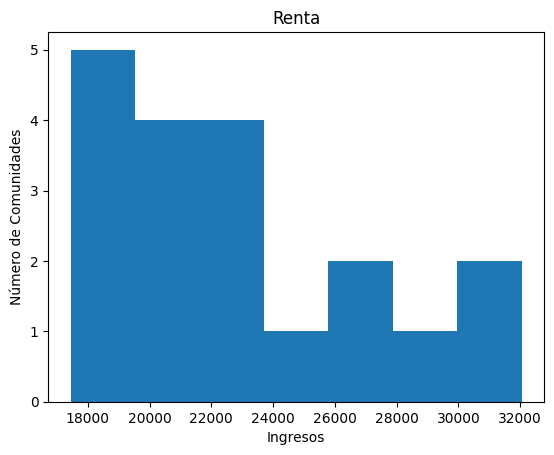

In [ ]:
# Para mostrar en el histograma los datos de ingresos hemos de indicar que queremos todas las filas de la primera columna
plt.hist(DatosMatriz[:,0],7 ) # recordar, columna 0 = primera variable y el 7 indica el número de grupos(columnas) a mostrar
#plt.hist(DatosMatriz[:,0]) # recordar, columna 0 = primera variable
plt.ylabel('Número de Comunidades')
plt.xlabel('Ingresos')
plt.title('Renta')
plt.show()

#Ejer 12: Filtrando los datos en el dataframe Datos, identificar las comunidades autónomas cuya renta
#      Apartado 1: Renta entre 26000€ y 28000€
#      Apartado 2: Renta superior a 30000€

In [ ]:
#Ejer 12: Filtrando los datos en el dataframe Datos, identificar las comunidades autónomas cuya renta
#      Apartado 1: Renta entre 26000€ y 28000€
#      Apartado 2: Renta superior a 30000€
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('/content/datos.csv', delimiter=';')

# Ver las primeras filas para comprobar la estructura de los datos
print(df.head())

# Ver las columnas para asegurarnos de que 'Renta' y 'Comunidad Autónoma' están presentes
print("Columnas en el DataFrame:", df.columns)
print("\n")

# Filtrar comunidades con renta entre 26000€ y 28000€
df_apartado1 = df[(df['Renta'] >= 26000) & (df['Renta'] <= 28000)]

# Mostrar el resultado para el Apartado 1
print("Apartado 1: Renta entre 26000€ y 28000€")
print(df_apartado1[['Comunidad', 'Renta']])
print("\n")

# Filtrar comunidades con renta superior a 30000€
df_apartado2 = df[df['Renta'] > 30000]

# Mostrar el resultado para el Apartado 2
print("Apartado 2: Renta superior a 30000€")
print(df_apartado2[['Comunidad', 'Renta']])
print("\n")


   Comunidad  Renta  DiferenciaRenta
0  ANDALUCIA  17747             -9.1
1     ARAGON  26512             -7.8
2   ASTURIAS  21149             -9.0
3    BALEARS  22048            -22.7
4   CANARIAS  17448            -18.4
Columnas en el DataFrame: Index(['Comunidad', 'Renta', 'DiferenciaRenta'], dtype='object')


Apartado 1: Renta entre 26000€ y 28000€
   Comunidad  Renta
1     ARAGON  26512
8  CATALUNYA  27812


Apartado 2: Renta superior a 30000€
     Comunidad  Renta
12      MADRID  32048
15  PAIS VASCO  30401




¿Y si queremos visualizar la diferencia de ingresos?

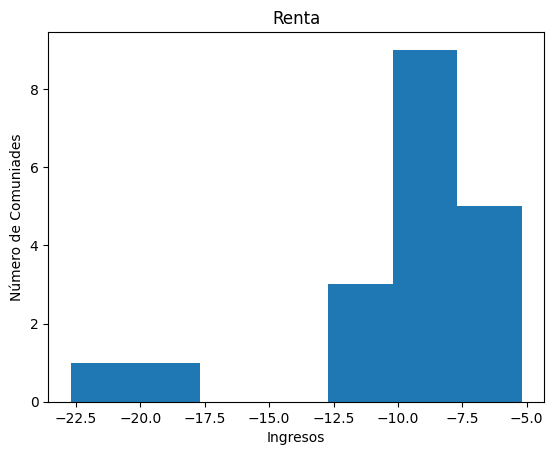

In [ ]:
plt.hist(DatosMatriz[:,1],7 ) # columna 1 = segunda variable
plt.ylabel('Número de Comuniades')
plt.xlabel('Ingresos')
plt.title('Renta')
plt.show()



# Vamos a analizar los datos de muestra de las comunidades autónomas para la Detección de **outliers**
Adaptación del cuaderno **Ejemplo 2.3 Outliers.ipynb**

In [ ]:
Ingresos=DatosMatriz[:,0] # Ingresos medios
datos=Ingresos # para reutilizar el código

**MÉTODO 1:**  Basado en la distribución normal

In [ ]:
# CRITERIO 1: PROBABILIDAD GLOBAL
# probabilidad de la muestra de estar dentro de las bandas
p_g=0.95
# probabilidad global de una cola
alfa_g=(1-p_g)/2
# probabilidad  de las colas para un solo dato
alfa= 1-(1-alfa_g)**(1/len(datos))
## CRITERIO 2:  Criterio Chauvenet
#alfa=1/(2*len(datos))
Z_alfa=st.norm.ppf(1-alfa/2)
# Impresión de resultados
alfa=round(alfa,5)
Z_alfa=round(Z_alfa,5)# k
print(f" Alfa ={alfa}")
print(f" CUANTIL Z_(1-alfa/2) ={Z_alfa}")

 Alfa =0.00133
 CUANTIL Z_(1-alfa/2) =3.20907


In [ ]:
xL=  round(np.mean(datos)-Z_alfa*  np.std(datos),4)
xU=  round(np.mean(datos)+Z_alfa*  np.std(datos),4)
print(f" Banda= [ {xL},{xU}]")

 Banda= [ 8608.4099,36982.9585]


In [ ]:
# No hay ninguna comunidad outlier respecto a los ingresos
for i in  range(len(datos)):
        if datos[i] < xL  or datos[i]>xU:
          print(f" El dato[{i}]={datos[i]} es un outlier")


**MÉTODO 2:**  Basado en la distancia entre cuartiles

In [ ]:
Q1 = np.quantile(datos,0.25)
Q3 = np.quantile(datos,0.75)
IQR = Q3 - Q1
k=1.5
xL=Q1 - k * IQR
xU=Q3 + k * IQR
outlier=np.array([]) # almacenamiento de las posiciones de los outliers
for i in  range(len(datos)):
        if datos[i] < xL  or datos[i]>xU:
          print(f" El dato[{i}]={datos[i]} es un outlier")
          outlier=np.concatenate((outlier,np.array([i])))

**¿Qué comunidades son?**

In [ ]:
Datos.loc[outlier,"Comunidad"]

,Comunidad


# Aplicamos las técnicas de **escalameniento de datos** a la información que tenemos de las comunidades autónomas

Adaptación del cuaderno **Ejemplo 2.5 Escalamiento de datos.**ipynb

In [ ]:
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [ ]:
# Escalamiento
# ==============================================================================
# Selección de columnas numéricas tipo doble o enteras
numeric_cols = Datos.select_dtypes(include=['float64', 'int']).columns.to_list()
# Standard scaler
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

# MinMaxScaler
preprocessor_MM = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

Datos_prep_SS = preprocessor_SS.fit_transform(Datos)
Datos_prep_MM = preprocessor_MM.fit_transform(Datos)
# Nota:
# Se podría aplicar las transformaciones a cualquier conjunto de datos con
# Data_new_prep_SS  = preprocessor_SS.transform(Data_new)

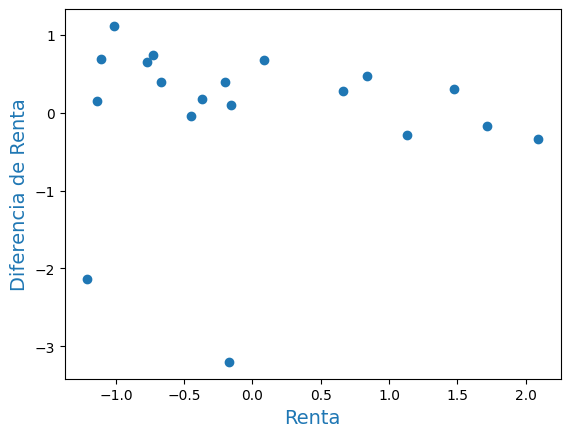

In [ ]:
# Representación de las dos variables escaladas z-score
fig, ax = plt.subplots()
ax.scatter(Datos_prep_SS[:,0], Datos_prep_SS[:,1])
ax.set_xlabel("Renta", fontdict = {'fontsize':14,  'color':'tab:blue'})
ax.set_ylabel("Diferencia de Renta",fontdict = {'fontsize':14,  'color':'tab:blue'})
plt.show()


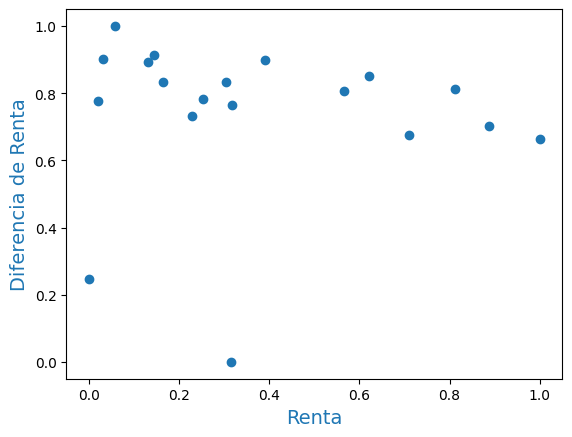

In [ ]:
# Representación de las variables escaladas Min-Max
fig, ax = plt.subplots()
ax.scatter(Datos_prep_MM[:,0], Datos_prep_MM[:,1])
ax.set_xlabel("Renta", fontdict = {'fontsize':14,  'color':'tab:blue'})
ax.set_ylabel("Diferencia de Renta",fontdict = {'fontsize':14,  'color':'tab:blue'})
plt.show()

<Axes: xlabel='Renta', ylabel='DiferenciaRenta'>

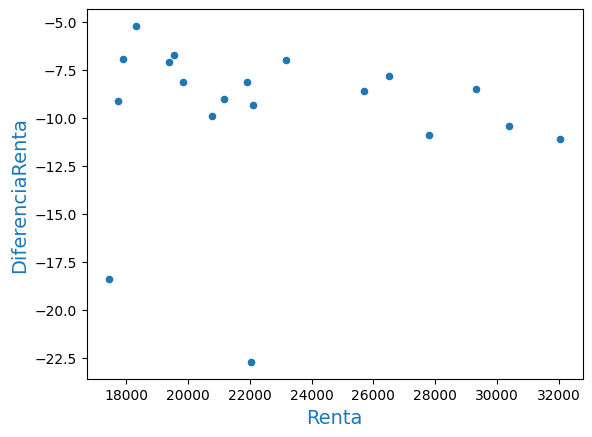

In [ ]:
# Dibujar los datos originales. Integración de matplotlib con pandas
# df.plot
fig, ax = plt.subplots()
ax.set_xlabel("Renta", fontdict = {'fontsize':14,  'color':'tab:blue'})
ax.set_ylabel("Diferencia de Renta",fontdict = {'fontsize':14,  'color':'tab:blue'})
Datos.plot(kind='scatter', x='Renta', y='DiferenciaRenta',ax=ax)